In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pip install statsmodels

     |████████████████████████████████| 9.9 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 56.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import statsmodels.api as sm

In [7]:
%ls datasets

adult.csv                  census.csv        nhanes_2015_2016.csv
airline_data.csv           cwurData.csv      pokemon.csv
antropometria00.csv        data.csv          sample_pivot.csv
antropometria-dataset.csv  endutih_2019.csv  tips.csv
Canada.xlsx                headbrain.csv     weight-height.csv
Cartwheeldata.csv          movies.csv


In [ ]:
df = pd.read_csv('datasets/nhanes_2015_2016.csv',
                 low_memory=False)
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [12]:
model = sm.OLS.from_formula('BPXSY1~RIDAGEYR',data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1524.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          6.35e-294
Time:                        02:53:05   Log-Likelihood:                -22745.
No. Observations:                5401   AIC:                         4.549e+04
Df Residuals:                    5399   BIC:                         4.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.5144      0.619    165.540      0.000     101.300     103.728
RIDAGEYR       0.4692      0.012     39.043      0.000       0.446       0.493
==============================================================================
Omnibus:                      784.418   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1825.182
Skew:                           0.840   Prob(JB):                         0.00
Kurtosis:                       5.299   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

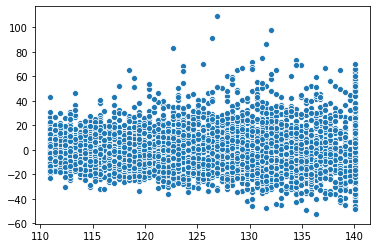

In [14]:
x = result.fittedvalues
y = result.resid
fig = sns.scatterplot( x = x,
                       y = y,
                     )

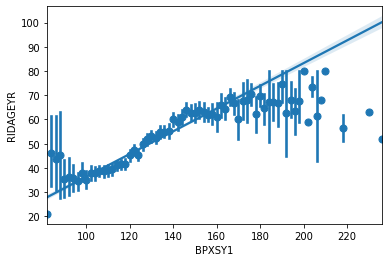

In [ ]:
ax = sns.regplot (x = 'BPXSY1',
                  y = 'RIDAGEYR',
                  data = df,
                 x_estimator = np.mean,
                 )

In [15]:
model = sm.OLS.from_formula ('BPXSY1 ~ RIDAGEYR+ BMXBMI + RIAGENDR',
                            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     574.7
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          9.88e-324
Time:                        03:11:56   Log-Likelihood:                -22409.
No. Observations:                5347   AIC:                         4.483e+04
Df Residuals:                    5343   BIC:                         4.485e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.5582      1.233     80.771      0.000      97.142     101.975
RIDAGEYR       0.4614      0.012     38.832      0.000       0.438       0.485
BMXBMI         0.3078      0.031      9.802      0.000       0.246       0.369
RIAGENDR      -3.7808      0.439     -8.607      0.000      -4.642      -2.920
==============================================================================
Omnibus:                      806.802   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1980.135
Skew:                           0.852   Prob(JB):                         0.00
Kurtosis:                       5.447   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""